## Tarea 9.9 
Calcule la siguiente integral

$$
\int_{0.1}^1 dx\,\frac{\ln(x)}{\sqrt{\cos^2(x) + \tanh(x)}}
$$

Hágalo usando la cuadratura adaptativa y el integrador de scipy. Grafique los tiempos que tardan ambos en función de la precisión pedida.

In [1]:
import numpy as np
from scipy import integrate 
# De scipy se importa integrate para usar una de las funciones 
# esta librería para comparar el resultado de la misma integral 
# con el método de cuadratura adaptativa.

import matplotlib.pyplot as plt

class MaxIterations(Exception):
    pass

def Método_de_Cuadratura_Adaptativa(f, a, b, tol, N=100000):
    
    '''
    Esta función usa el método de cuadratura adaptativa con
    la función que queremos interpolar, el intervalo de integración
    y la tolerancia como parámetros de la función, aproximando la 
    integral en varios intervalos.
    
    Inputs:
    f : la función que interpolaremos.
    
    a,b : Límites de Integración
    
    tol: es la tolerancia o error de la aproximanción.
    
    N: es el número de iteraciones.
    '''
    
    # Variables iniciales
    approx = 0
    i = 0
    toli = [10*tol]
    ai = [a]
    hi = [(b - a)/2]
    fai = [f(a)]
    fbi = [f(b)]
    fci = [f(a + hi[i])]
    S0i = [hi[i]*(fai[i] + 4*fci[i] + fbi[i])/3]
    Li = [1]
    
        
    
    while i >= 0:
        
        fd = f(ai[i] + hi[i]/2)
        fe = f(ai[i] + 3*hi[i]/2)
        S1 = hi[i]*(fai[i] + 4*fd + fci[i])/6
        S2 = hi[i]*(fci[i] + 4*fe + fbi[i])/6
        ai_prec = ai[i]
        hi_prec = hi[i]
        fai_prec = fai[i]
        fbi_prec = fbi[i]
        fci_prec = fci[i]
        toli_prec = toli[i]
        S0i_prec = S0i[i]
        Li_prec = Li[i]
        
        i -= 1
        if abs(S1 + S2 - S0i_prec) < toli_prec:
            approx += S1 + S2
        else:
            if Li_prec >= N:
                raise MaxIterations("Alcanzado máximo número de iteraciones.")
            
            # Intervalo derecho
            i += 1
            if i >= len(ai): # A veces hay que ampliar la lista
                ai.append(ai_prec + hi_prec)
                fai.append(fci_prec)
                fci.append(fe)
                fbi.append(fbi_prec)
                hi.append(hi_prec/2)
                toli.append(toli_prec/2)
                S0i.append(S2)
                Li.append(Li_prec + 1)
            else:
                ai[i] = ai_prec + hi_prec
                fai[i] = fci_prec
                fci[i] = fe
                fbi[i] = fbi_prec
                hi[i] = hi_prec/2
                toli[i] = toli_prec/2
                S0i[i] = S2
                Li[i] = Li_prec + 1
                
            # Intervalo izquierdo
            i += 1
            if i >= len(ai):
                ai.append(ai_prec)
                fai.append(fai_prec)
                fci.append(fd)
                fbi.append(fci_prec)
                hi.append(hi[i-1])
                toli.append(toli[i-1])
                S0i.append(S1)
                Li.append(Li[i-1])
            else:
                ai[i] = ai_prec
                fai[i] = fai_prec
                fci[i] = fd
                fbi[i] = fci_prec
                hi[i] = hi[i-1]
                toli[i] = toli[i-1]
                S0i[i] = S1
                Li[i] = Li[i-1]
                
    return approx
# Lo que se hizo es resolver por cada intervalo una aproximación.
def f(x):
    '''
    Es la función que esta definida en este ejercicio.
    '''
    return np.log(x)/(np.sqrt(np.cos(x)**2 + np.tanh(x))) 
# Se define la función que queremos integrar con el método de arriba.

In [2]:
x2 = lambda x : np.log(x)/(np.sqrt(np.cos(x)**2 + np.tanh(x))) 
# usamos scipy para comparar.
integrate.quad(x2, 0.1, 1)
print("La integral con el método de cuadratura adaptativa en el intervalo [0.1,1] es", 
      Método_de_Cuadratura_Adaptativa(f, 0.1, 1, 0.0000001))
print("La integral con el método de scipy es", integrate.quad(x2, 0.1, 1)[0], "con una precisión de", integrate.quad(x2, 0.1, 1)[1])


La integral con el método de cuadratura adaptativa en el intervalo [0.1,1] es -0.6169302025292239
La integral con el método de scipy es -0.6169301768805372 con una precisión de 4.699237926463449e-11


Ahora veremos como calcular el tiempo



In [51]:
from time import time_ns
def medir_tiempo_cuadratura_adaptativa( Método_de_Cuadratura_Adaptativa, tol):
    '''
    Esta función me entrega un valor de tiempo (en nanosegundos)
    cada vez que hago correr el código del método de cuadratura
    adaptativa.
    '''
    t1 = time_ns()
    Método_de_Cuadratura_Adaptativa(f,0.1,1,tol)
    tf = time_ns() - t1
    return tf


In [65]:
medir_tiempo_cuadratura_adaptativa(Método_de_Cuadratura_Adaptativa, 1e-7)

1004700

In [56]:
lista_tiempo = [medir_tiempo_cuadratura_adaptativa(Método_de_Cuadratura_Adaptativa, toli) for toli in tol]
# Se hace la compresión de listas

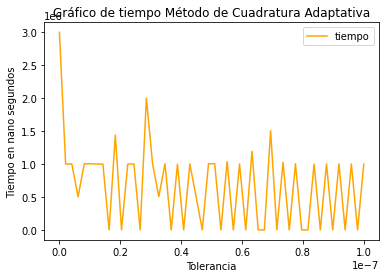

In [59]:
tol = np.linspace(1e-10,1e-7)
plt.plot(tol,lista_tiempo,label ="tiempo", color="Orange")
plt.title("Gráfico de tiempo Método de Cuadratura Adaptativa")
plt.xlabel("Tolerancia")
plt.ylabel("Tiempo en nano segundos")
plt.legend()
plt.show()



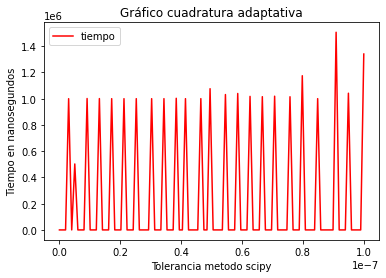

In [67]:
# Iniciamos un ciclo for.
tolerancia = np.linspace(1e-10,1e-7, 100)
Tiempo_integrate_quad = [] # Se define esto como una lista vacía.
for tiempo in tolerancia: # Se inicia un ciclo
    tiempo1 = time_ns()
    integrate.quad(x2,0.1,1,epsrel=tiempo)
    tiempo2 = time_ns()
    tiempo_final = tiempo2 - tiempo1
    Tiempo_integrate_quad.append(tiempo_final)
    # Se agrega los valores de tiempos en la lista
plt.plot(tolerancia,Tiempo_integrate_quad, label="tiempo", color="red")
plt.title("Gráfico cuadratura adaptativa")
plt.ylabel("Tiempo en nanosegundos")
plt.xlabel("Tolerancia metodo scipy")
plt.legend()
plt.show()

Vemos que scipy se demora mucho menos tiempo que con el método de cuadratura adaptativa
